_LEARNING-CIRCLE-24 PROJECT_

<h2> Learning-Circle-24 </h2> <p>  Contributors </p>

# **Crime in Chicago**
This is a dataset
The data dictionary can be found in [Chicago Crime Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

In this notebook, we are going to explore more about crime in Chicago and try to answer few questions.

Analyzing the Chicago crime dataset involves examining various aspects of the data to understand patterns, trends, and characteristics of criminal activities in Chicago. We perform analysis using Python, pandas and visualization libraries using the following steps:

1. Load the Dataset: Load the Chicago crime dataset into a DataFrame.
2. Explore the Dataset: Examine the structure, columns, and basic statistics of the dataset.
3. Data Preprocessing: We cleaned the data by dropping redundant columns,handling missing values and converting columns to their appropriate format.
4. Feature Engineering: Create new column for Months, Day, Season
5. EDA: Exploratory Data Analysis(Non-Graphical)
    - What is the total number of crime cases registered by the police department from 2001 to 2022?
    - What is the number of unique crime cases?
    - What is the number of non-unique cases?
    - Out of total case registered how many are arrested and how many are not?
    - How many unique crime type is available and what is the count for each crime from 2001-2022?
    - what is the number of crime per year?
    - What is the number of crime per month?
    - what is the number of crime by season?
    - what is the number of crime per day?
    - What are the top 10 most common crime types?
    - what are the top 10 most common location description for crimes?
    - what are the top 10 most common crimes in 2021?
    - How many crimes were reported each month in 2021 ?
    - what is the top 10 days with the most crime count ?
    - what are the Crimes with the most Arrest?
    - Count of Arrest and Non arrest for each Crime type.
    - Percentage of Arrest and Non arrest for each Crime type.
- Exploratory Data Analysis(Graphical)
    - Trend of crimes in chicago from 2001 to 2022(Line chart)
    - Monthly crime trend(Line chart)
    - Seasonal crime trend(Line chart)
    - Daily Crime trend(Line chart)
    - Top 10 Days with the Most Crime Counts Each Day(Bar chart)
    - Top 6 Most reported Crime(ggplot)
    - Top 10 common crime by type(Pie Chart)
    - Top 10 Common location for crimes
        1. Top 10 Location Description for crimes
        2. Top 10 Community Area for crimes
        3. Top 10 Ward for crimes
        4. Top 10 Block for crimes
    - Top - 10 communities with the most crime in 2021
    - Top - 5 Primary Crime Types and Their Locations in Chicago (2021)
    - Top - 10 Location where theft normally occurs
    - Top - 10 Location for theft in Chicago in 2021
    - Number of crimes per Year x Months
    - Are there specific location that crimes used to happen?
    - Count of Arrest and Non-Arrest for Each Crime Type
    
6. Summarize and Visualize Insights: Summarize and Visualize the key insights and findings from the analysis using plots and charts.
    - How has crime in Chicago changed across years? Was 2021 really the bloodiest year in two decades?
    - Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week, or specific month of the year than other types of crimes?
    

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
# Set display option
pd.set_option('display.max.columns', None)

# 1. Loading the dataset

This dataset was extracted in 2023 and contains crime cases from 2001 to 2023, but we want the data for only cases from 2001 to 2022 due to incomplete cases for 2023 in order to avoid a bias analysis.

In [3]:
full_dataset = pd.read_csv('../Data-Science-Projects/dataset/crime_data_chicago.csv')
# Drop rows that have 2023 as the year.
chicago_crime_df = pd.DataFrame(full_dataset[full_dataset['Year'] != 2023])
chicago_crime_df.head()

Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  Beat  District  \
0                                  STREET   False     False   423       4.0   
1                               POOL ROOM    True     False   413       4.0   
2                               RESIDENCE    True     False  1711      17.0   
3            NURSING HOME/RETIREMENT HOME   False     False  1115      11.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  1231      12.0   

   Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0  10.0            46.0       14     1196638.0     1848800.0  2008   
1   8.0            47.0       15     1184499.0     1843935.0  2018   
2  39.0            12.0       05     1146911.0     1941022.0  2007   
3  28.0            26.0      08A     1148388.0     1899882.0  2018   
4  27.0            28.0      04A     1165430.0     1897441.0  2021   

               Updated On   Latitude  Longitude                       Location  
0  02/28/2018 03:56:25 PM  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  08/07/2018 04:02:59 PM  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  02/28/2018 03:56:25 PM  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  07/30/2018 03:52:24 PM  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  07/18/2021 04:56:02 PM  41.874174 -87.668082  (41.874173691, -87.668082118)

# 2. Explore the dataset

In [4]:
#checking the dimension of the dataset
chicago_crime_df.shape

(2278726, 23)

In [5]:
# Display the first five rows of the dataset
chicago_crime_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [6]:
# check the first five observations
chicago_crime_df.head()

Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  Beat  District  \
0                                  STREET   False     False   423       4.0   
1                               POOL ROOM    True     False   413       4.0   
2                               RESIDENCE    True     False  1711      17.0   
3            NURSING HOME/RETIREMENT HOME   False     False  1115      11.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  1231      12.0   

   Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0  10.0            46.0       14     1196638.0     1848800.0  2008   
1   8.0            47.0       15     1184499.0     1843935.0  2018   
2  39.0            12.0       05     1146911.0     1941022.0  2007   
3  28.0            26.0      08A     1148388.0     1899882.0  2018   
4  27.0            28.0      04A     1165430.0     1897441.0  2021   

               Updated On   Latitude  Longitude                       Location  
0  02/28/2018 03:56:25 PM  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  08/07/2018 04:02:59 PM  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  02/28/2018 03:56:25 PM  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  07/30/2018 03:52:24 PM  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  07/18/2021 04:56:02 PM  41.874174 -87.668082  (41.874173691, -87.668082118)

In [7]:
 # Display column information and data types
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [8]:
# checking missing value count
chicago_crime_df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [9]:
chicago_crime_df.describe()

Unnamed: 0            ID          Beat      District          Ward  \
count  2.278726e+06  2.278726e+06  2.278726e+06  2.278714e+06  2.094031e+06   
mean   1.139362e+06  6.882068e+06  1.186442e+03  1.129072e+01  2.272764e+01   
std    6.578117e+05  3.419168e+06  7.026836e+02  6.946692e+00  1.383464e+01   
min    0.000000e+00  6.370000e+02  1.110000e+02  1.000000e+00  1.000000e+00   
25%    5.696812e+05  3.716076e+06  6.210000e+02  6.000000e+00  1.000000e+01   
50%    1.139362e+06  6.885990e+06  1.034000e+03  1.000000e+01  2.300000e+01   
75%    1.709044e+06  9.887568e+06  1.731000e+03  1.700000e+01  3.400000e+01   
max    2.278725e+06  1.278199e+07  2.535000e+03  3.100000e+01  5.000000e+01   

       Community Area  X Coordinate  Y Coordinate          Year      Latitude  \
count    2.094459e+06  2.254741e+06  2.254741e+06  2.278726e+06  2.254741e+06   
mean     3.752140e+01  1.164569e+06  1.885747e+06  2.009638e+03  4.184209e+01   
std      2.153282e+01  1.673955e+04  3.209855e+04  6.019724e+00  8.830434e-02   
min      0.000000e+00  0.000000e+00  0.000000e+00  2.001000e+03  3.661945e+01   
25%      2.300000e+01  1.152948e+06  1.859053e+06  2.004000e+03  4.176866e+01   
50%      3.200000e+01  1.166060e+06  1.890673e+06  2.009000e+03  4.185578e+01   
75%      5.700000e+01  1.176365e+06  1.909219e+06  2.014000e+03  4.190668e+01   
max      7.700000e+01  1.205119e+06  1.951622e+06  2.022000e+03  4.202291e+01   

          Longitude  
count  2.254741e+06  
mean  -8.767161e+01  
std    6.073538e-02  
min   -9.168657e+01  
25%   -8.771379e+01  
50%   -8.766597e+01  
75%   -8.762823e+01  
max   -8.752453e+01

# 3. Data Preprocessing

**Data Cleaning**

Here are some steps that we would carry out in this phase

1. Remove redundant or unnecessary columns
2. Handle missing values
3. Convert data types to the appropriate formats  

__Reasons for dropping the below columns__
- 'Unnamed: 0': Its just an index for individual row/ Observation
- 'ID': Serial identifier for the record which is redundant due to the presence of a case number for each case.
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column
- Description: It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted.
- FBI Code: Removed because it is not necessary for our analysis as we are unable to de-code these codes.

__1. Use a funtion to Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID and Case number)__

In [10]:
chicago_crime_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [11]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['Unnamed: 0','ID', 'Location','Updated On', 'FBI Code', 'Description', 'X Coordinate','Y Coordinate','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)

drop_redundant_columns(chicago_crime_df)

In [12]:
chicago_crime_df.head()

Case Number                    Date                 Block  \
0    HP485721  07/26/2008 02:30:00 PM  085XX S MUSKEGON AVE   
1    JB372830  07/31/2018 10:57:00 AM     092XX S ELLIS AVE   
2    HN308568  04/27/2007 10:30:00 AM     062XX N TRIPP AVE   
3    JB361368  07/23/2018 08:55:00 AM    0000X N KEELER AVE   
4    JE297624  07/11/2021 06:40:00 AM   016XX W HARRISON ST   

        Primary Type                    Location Description  Arrest  \
0    CRIMINAL DAMAGE                                  STREET   False   
1  WEAPONS VIOLATION                               POOL ROOM    True   
2           BURGLARY                               RESIDENCE    True   
3            ASSAULT            NURSING HOME/RETIREMENT HOME   False   
4            ASSAULT  PARKING LOT / GARAGE (NON RESIDENTIAL)   False   

   Domestic  Beat  District  Ward  Community Area  Year   Latitude  Longitude  
0     False   423       4.0  10.0            46.0  2008  41.739980 -87.555120  
1     False   413       4.0   8.0            47.0  2018  41.726922 -87.599747  
2     False  1711      17.0  39.0            12.0  2007  41.994138 -87.734959  
3     False  1115      11.0  28.0            26.0  2018  41.881217 -87.730590  
4     False  1231      12.0  27.0            28.0  2021  41.874174 -87.668082

In [13]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 213.0+ MB


In [14]:
# A summary statistics of each column
chicago_crime_df.describe(include='all')

Case Number                    Date             Block Primary Type  \
count      2278725                 2278726           2278726      2278726   
unique     2278678                 1343546             54347           35   
top       HK172551  01/01/2008 12:01:00 AM  100XX W OHARE ST        THEFT   
freq             3                      81              4878       479375   
mean           NaN                     NaN               NaN          NaN   
std            NaN                     NaN               NaN          NaN   
min            NaN                     NaN               NaN          NaN   
25%            NaN                     NaN               NaN          NaN   
50%            NaN                     NaN               NaN          NaN   
75%            NaN                     NaN               NaN          NaN   
max            NaN                     NaN               NaN          NaN   

       Location Description   Arrest Domestic          Beat      District  \
count               2275849  2278726  2278726  2.278726e+06  2.278714e+06   
unique                  198        2        2           NaN           NaN   
top                  STREET    False    False           NaN           NaN   
freq                 590957  1675252  1965311           NaN           NaN   
mean                    NaN      NaN      NaN  1.186442e+03  1.129072e+01   
std                     NaN      NaN      NaN  7.026836e+02  6.946692e+00   
min                     NaN      NaN      NaN  1.110000e+02  1.000000e+00   
25%                     NaN      NaN      NaN  6.210000e+02  6.000000e+00   
50%                     NaN      NaN      NaN  1.034000e+03  1.000000e+01   
75%                     NaN      NaN      NaN  1.731000e+03  1.700000e+01   
max                     NaN      NaN      NaN  2.535000e+03  3.100000e+01   

                Ward  Community Area          Year      Latitude     Longitude  
count   2.094031e+06    2.094459e+06  2.278726e+06  2.254741e+06  2.254741e+06  
unique           NaN             NaN           NaN           NaN           NaN  
top              NaN             NaN           NaN           NaN           NaN  
freq             NaN             NaN           NaN           NaN           NaN  
mean    2.272764e+01    3.752140e+01  2.009638e+03  4.184209e+01 -8.767161e+01  
std     1.383464e+01    2.153282e+01  6.019724e+00  8.830434e-02  6.073538e-02  
min     1.000000e+00    0.000000e+00  2.001000e+03  3.661945e+01 -9.168657e+01  
25%     1.000000e+01    2.300000e+01  2.004000e+03  4.176866e+01 -8.771379e+01  
50%     2.300000e+01    3.200000e+01  2.009000e+03  4.185578e+01 -8.766597e+01  
75%     3.400000e+01    5.700000e+01  2.014000e+03  4.190668e+01 -8.762823e+01  
max     5.000000e+01    7.700000e+01  2.022000e+03  4.202291e+01 -8.752453e+01

In [15]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 213.0+ MB


__3. Handling missing values__

In [16]:
# checking missing value count
chicago_crime_df.isnull().sum()

Case Number                  1
Date                         0
Block                        0
Primary Type                 0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
Year                         0
Latitude                 23985
Longitude                23985
dtype: int64

In [17]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
Ward                          184695                8.1
Community Area                184267                8.1
Latitude                       23985                1.1
Longitude                      23985                1.1
Location Description            2877                0.1
District                          12                0.0
Case Number                        1                0.0

- __Handling Missing Case Number__

We have one (1) missing Case Number in the entire dataset. We have decided to drop the row where Case Number is missing

In [19]:
# dropping the missing Case Number column null value
chicago_crime_df.dropna(subset=['Case Number'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [20]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
Year                         0
Latitude                 23984
Longitude                23984
dtype: int64

- __Handling Missing values for the District Column__

We have just 12 missing value for the district column which is 0.0% of the entire dataset. We have decided to drop the row where location discription is missing.

In [21]:
# dropping the missing district column null value
chicago_crime_df.dropna(subset=['District'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [22]:
chicago_crime_df.District.unique()

array([ 4., 17., 11., 12.,  2., 15., 25., 14.,  8.,  6., 19.,  1.,  7.,
       20., 18.,  3.,  9., 22.,  5., 16., 10., 24., 31.])

In [23]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    184695
Community Area          184267
Year                         0
Latitude                 23984
Longitude                23984
dtype: int64

- __Handling Missing values for the ward Column (Using data imputation)__

In [24]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


Missing Values  % of Total Values
Ward                          184695                8.1
Community Area                184267                8.1
Latitude                       23984                1.1
Longitude                      23984                1.1
Location Description            2877                0.1

In [25]:
# checking the unique values of the ward column
chicago_crime_df.Ward.unique()

array([10.,  8., 39., 28., 27., nan, 29., 37., 26., 35., 14.,  1., 17.,
        3., 44., 36.,  4.,  2.,  6.,  7., 40., 42., 20., 13., 11., 34.,
       47., 33.,  9., 21., 45., 25., 24., 15., 16., 19., 43., 30., 23.,
       32., 31., 22., 50., 49.,  5., 46., 12., 41., 38., 18., 48.])

In [26]:
chicago_crime_df.Ward

0          10.0
1           8.0
2          39.0
3          28.0
4          27.0
           ... 
2278721    42.0
2278722     NaN
2278723     4.0
2278724    42.0
2278725     1.0
Name: Ward, Length: 2278713, dtype: float64

In [27]:
# Using ffill(forward fill) to fill missing value in the ward column
chicago_crime_df.Ward = chicago_crime_df.Ward.ffill() # Last observed value is carried forward

In [28]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                         0
Community Area          184267
Year                         0
Latitude                 23984
Longitude                23984
dtype: int64

- __Handling Missing values for the Community Area Column (Using data imputation)__

In [29]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


Missing Values  % of Total Values
Community Area                184267                8.1
Latitude                       23984                1.1
Longitude                      23984                1.1
Location Description            2877                0.1

In [30]:
# checking the unique values of the ward column
chicago_crime_df['Community Area'].unique()

array([46., 47., 12., 26., 28., nan, 25., 23., 22., 27., 63., 24., 71.,
       38.,  6., 19., 55., 36., 32., 69., 43.,  4.,  8., 42., 65., 60.,
       14., 49., 35., 40., 21., 73., 52., 15., 18., 16., 61., 66., 44.,
       45., 67., 74.,  2., 29., 51., 57., 17.,  7., 62., 30., 31., 13.,
       75.,  5.,  1., 39., 53.,  3., 68., 11., 37., 41., 48., 33., 59.,
       58., 76., 54., 10., 20., 34., 77., 64., 56., 70.,  9., 72., 50.,
        0.])

In [31]:
# Using ffill(forward fill) to fill missing value in the Community Area column
chicago_crime_df['Community Area'] = chicago_crime_df['Community Area'].ffill() # Last observed value is carried forward

In [32]:
chicago_crime_df.isna().sum()

Case Number                 0
Date                        0
Block                       0
Primary Type                0
Location Description     2877
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
Year                        0
Latitude                23984
Longitude               23984
dtype: int64

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation) <br>
    - The assumption here is that the latitude and longitude readings are points that show exact location, are closer to eachother within a district. if they are, we can group our data by districts and fill up missing Latitide and longitude values by the median or mode.

In [33]:
chicago_crime_df.groupby(['District', 'Longitude', 'Latitude']).size()

District  Longitude   Latitude 
1.0       -87.776059  41.933944    1
          -87.645624  41.881909    4
          -87.645320  41.885582    2
          -87.645301  41.878079    1
          -87.645121  41.885586    1
                                  ..
31.0      -87.673838  41.776755    1
          -87.631942  41.930460    1
          -87.617227  41.646187    1
          -87.610757  41.884107    1
          -87.562704  41.737240    1
Length: 548193, dtype: int64

There appears to be closeness in longitude and Latitude points when data is grouped based on districts, we can group based on district and fill up by taking the median.

In [34]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [35]:
chicago_crime_df.isna().sum()

Case Number                0
Date                       0
Block                      0
Primary Type               0
Location Description    2877
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
Year                       0
Latitude                   0
Longitude                  0
dtype: int64

- __Handling Missing values for the Location Description__

We have just 2877 missing value for the location description which is 0.1% of the entire dataset. We can decide to drop the row where location decription is missing or fill this row with the most crime location.

In [36]:
chicago_crime_df.groupby(['District','Location Description']).size()

District  Location Description                       
1.0       ABANDONED BUILDING                              18
          AIRPORT BUILDING NON-TERMINAL - SECURE AREA      1
          AIRPORT TRANSPORTATION SYSTEM (ATS)              2
          AIRPORT/AIRCRAFT                                 4
          ALLEY                                          529
                                                        ... 
31.0      RESIDENTIAL YARD (FRONT/BACK)                    1
          SIDEWALK                                         2
          SMALL RETAIL STORE                               2
          STREET                                          12
          VEHICLE NON-COMMERCIAL                           2
Length: 2915, dtype: int64

In [37]:
# dropping the missing location description index row
chicago_crime_df.dropna(subset=['Location Description'],inplace=True)

In [38]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

__3. convert inappropriate data types to the correct one__

We should convert the columns to appropriate datatypes for
1. Alignment with original dataset types.
2. For performance gains (clearly, using a numpy.float64 when a numpy.int64 is required will lower our memory footprint).

In [39]:
# create a copy of the dataframe to avoid conflict
c_crime_df = chicago_crime_df.copy()

In [40]:
# Including the date format dramatically increases performance.
c_crime_df["Date"] = pd.to_datetime(c_crime_df["Date"], format = "%m/%d/%Y %I:%M:%S %p", utc = True)
c_crime_df["Beat"] = c_crime_df["Beat"].astype(str)
c_crime_df["District"] = c_crime_df["District"].astype(str)
c_crime_df["Ward"] = c_crime_df["Ward"].astype(str)
c_crime_df["Community Area"] = c_crime_df["Community Area"].astype(str)
c_crime_df['Block'] = c_crime_df['Block'].astype(str)

# 4. Feature Engineering

Create new columns for Hour, Date, Block_new, Street, Months, Day, Season and Crime type.

In [41]:
# Create new columns for Months
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    month_names = date_column.dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [42]:

c_crime_df['Month'] = extract_and_map_month(c_crime_df['Date'])

# Group by month and count number of crimes
monthly_crime_counts = c_crime_df.groupby('Month').size()

In [43]:
# Create new columns for Day
def extract_and_map_day(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    day_names = date_column.dt.day_name()
# dt is an attribute of the date column object
# day_name() is a method
    return day_names

In [44]:
c_crime_df['Day'] = extract_and_map_day(c_crime_df['Date'])

# Group by day and count number of crimes
daily_crime_counts = c_crime_df.groupby('Day').size()

In [45]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [46]:
c_crime_df['Season'] = c_crime_df['Month'].apply(get_season)

# Group by season and count number of crimes
seasonal_crime_counts = c_crime_df.groupby('Season').size()


In [47]:
# Creating a new column for hour

# Convert 'Date' column to datetime
c_crime_df['Date'] = pd.to_datetime(c_crime_df['Date'])

# Extract hour from 'Date' and create a new column 'Hour'
c_crime_df['Hour'] = c_crime_df['Date'].dt.hour

#### Create a Crime Type Table

In [48]:
# Classified the crimes based on Theft, Violent Crime, and various other types based off on primary type 
c_crime_df['Crime Type'] = c_crime_df['Primary Type']

c_crime_df['Crime Type'].replace(['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT'], 'THEFT', inplace = True)

c_crime_df['Crime Type'].replace(['ASSAULT', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ARSON', 'ROBBERY', 'BATTERY'], 'VIOLENT CRIME', inplace = True)
       

In [49]:
c_crime_df.head()

Case Number                      Date                 Block  \
0    HP485721 2008-07-26 14:30:00+00:00  085XX S MUSKEGON AVE   
1    JB372830 2018-07-31 10:57:00+00:00     092XX S ELLIS AVE   
2    HN308568 2007-04-27 10:30:00+00:00     062XX N TRIPP AVE   
3    JB361368 2018-07-23 08:55:00+00:00    0000X N KEELER AVE   
4    JE297624 2021-07-11 06:40:00+00:00   016XX W HARRISON ST   

        Primary Type                    Location Description  Arrest  \
0    CRIMINAL DAMAGE                                  STREET   False   
1  WEAPONS VIOLATION                               POOL ROOM    True   
2           BURGLARY                               RESIDENCE    True   
3            ASSAULT            NURSING HOME/RETIREMENT HOME   False   
4            ASSAULT  PARKING LOT / GARAGE (NON RESIDENTIAL)   False   

   Domestic  Beat District  Ward Community Area  Year   Latitude  Longitude  \
0     False   423      4.0  10.0           46.0  2008  41.739980 -87.555120   
1     False   413      4.0   8.0           47.0  2018  41.726922 -87.599747   
2     False  1711     17.0  39.0           12.0  2007  41.994138 -87.734959   
3     False  1115     11.0  28.0           26.0  2018  41.881217 -87.730590   
4     False  1231     12.0  27.0           28.0  2021  41.874174 -87.668082   

   Month       Day  Season  Hour         Crime Type  
0   July  Saturday  Summer    14    CRIMINAL DAMAGE  
1   July   Tuesday  Summer    10  WEAPONS VIOLATION  
2  April    Friday  Spring    10              THEFT  
3   July    Monday  Summer     8      VIOLENT CRIME  
4   July    Sunday  Summer     6      VIOLENT CRIME

In [50]:
c_crime_df.columns

Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Year', 'Latitude', 'Longitude', 'Month', 'Day', 'Season', 'Hour',
       'Crime Type'],
      dtype='object')

# 4. EDA: Data Exploration

## Non - Graphical

1.  What is the total number of crime cases registered by the police department from 2001 to 2022?
 

In [51]:
print(f"The total number of crime cases registered from 2001 to 2022 is: **{len(c_crime_df)}**")

The total number of crime cases registered from 2001 to 2022 is: **2275836**


2. What is the number of unique crime cases?

In [52]:
# Number of Unique Case Number.
print(f"Out of {len(c_crime_df)}: {len(c_crime_df['Case Number'].unique())} are unique case numbers")

Out of 2275836: 2275789 are unique case numbers


**Observation**: Most case numbers are unique case numbers.

3. What is the number of non-unique cases?

In [53]:
# Out of all cases , how many are non_unique cases ?

non_unique_case_number = c_crime_df[c_crime_df.duplicated('Case Number') | c_crime_df.duplicated('Case Number', keep=False)]['Case Number'].tolist()

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(c_crime_df)}")

Length of non_unique: 92 out of 2275836


In [54]:
non_unique_case_number_df = c_crime_df[c_crime_df.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

Case Number                      Date                 Block  \
25445     HM763064 2006-12-08 15:14:00+00:00    005XX W MADISON ST   
58104     JB483810 2018-10-21 02:39:00+00:00  001XX N LOCKWOOD AVE   
74485     HK172551 2004-02-08 23:44:00+00:00    034XX W MADISON ST   
80580     HV620483 2012-12-31 16:49:00+00:00       042XX W 21ST PL   
126290    HR146859 2009-01-31 01:10:00+00:00     039XX W ARGYLE ST   

       Primary Type Location Description  Arrest  Domestic  Beat District  \
25445      HOMICIDE               OFFICE    True     False   111      1.0   
58104      HOMICIDE                 AUTO   False     False  1523     15.0   
74485      HOMICIDE               CHURCH   False     False  1123     11.0   
80580      HOMICIDE            APARTMENT    True      True  1012     10.0   
126290     HOMICIDE            APARTMENT    True     False  1712     17.0   

        Ward Community Area  Year   Latitude  Longitude     Month       Day  \
25445   42.0           28.0  2006  41.881884 -87.640060  December    Friday   
58104   28.0           25.0  2018  41.883604 -87.757629   October    Sunday   
74485   28.0           27.0  2004  41.880909 -87.711843  February    Sunday   
80580   24.0           29.0  2012  41.852505 -87.730687  December    Monday   
126290  39.0           14.0  2009  41.971903 -87.726290   January  Saturday   

        Season  Hour     Crime Type  
25445   Winter    15  VIOLENT CRIME  
58104     Fall     2  VIOLENT CRIME  
74485   Winter    23  VIOLENT CRIME  
80580   Winter    16  VIOLENT CRIME  
126290  Winter     1  VIOLENT CRIME

**Observation**: There are 2275789 unique values of case number out of 2275836 , it means there are 2275789 cases registered with a single crime the rest 92 are the case numbers which have commited multiple crimes.

4. Out of total case registered how many are arrested and how many are not?

In [55]:
# Out of total case registered how many are arrested and how many are not?

arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] == True).count()
not_arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] != True).count()

print(f"Out of {len(c_crime_df)},\n{arrested} are Arrested and \n{not_arrested} are not Arrested.")

Out of 2275836,
603465 are Arrested and 
1672371 are not Arrested.


**Observation**: Out of total crime cases received, 27% of the Criminals are arrested, 73% were not.

5. How many unique Primary type is available and what is the count for each crime from 2001-2022?

In [56]:
# Group by Primary type and calculate count
crime_count = c_crime_df['Primary Type'].unique()
print(f'The Number of unique Primary crimes are {len(crime_count)} and the count for each crime are:')
count_for_each_crime = pd.DataFrame(c_crime_df.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())
count_for_each_crime

The Number of unique Primary crimes are 35 and the count for each crime are:


Primary Type   Count
0                               THEFT  479153
1                             BATTERY  418647
2                     CRIMINAL DAMAGE  259959
3                           NARCOTICS  222861
4                             ASSAULT  147662
5                       OTHER OFFENSE  141627
6                            BURGLARY  125161
7                 MOTOR VEHICLE THEFT  105852
8                  DECEPTIVE PRACTICE   96707
9                             ROBBERY   85694
10                  CRIMINAL TRESPASS   63498
11                  WEAPONS VIOLATION   30210
12                       PROSTITUTION   20795
13         OFFENSE INVOLVING CHILDREN   16320
14             PUBLIC PEACE VIOLATION   15510
15                        SEX OFFENSE    8806
16                CRIM SEXUAL ASSAULT    8363
17   INTERFERENCE WITH PUBLIC OFFICER    5494
18               LIQUOR LAW VIOLATION    4470
19                           GAMBLING    4345
20                              ARSON    3886
21                           HOMICIDE    3597
22                         KIDNAPPING    2172
23            CRIMINAL SEXUAL ASSAULT    1589
24                       INTIMIDATION    1397
25                           STALKING    1338
26  CONCEALED CARRY LICENSE VIOLATION     305
27                          OBSCENITY     224
28                   PUBLIC INDECENCY      58
29                       NON-CRIMINAL      48
30                  HUMAN TRAFFICKING      32
31           OTHER NARCOTIC VIOLATION      31
32                     NON - CRIMINAL      12
33                          RITUALISM      11
34   NON-CRIMINAL (SUBJECT SPECIFIED)       2

**Observation:**

The number of unique primary types available in the dataset from 2001 to 2022 are 35, The count for each crime type during this period are shown above with **Theft** Being the highest with a count of **479153**.
This analysis provides insights into the prevalence of different types of crimes over the specified time frame, particularly focusing on the occurrence of theft, which is the highest among all primary types.

6. what is the number of crime per year?

In [57]:
# Count the number of crimes per year
crime_counts_per_year = c_crime_df['Year'].value_counts().sort_index().rename('Count').reset_index()
print(f'The amount of crimes per year are as follow: ')
crime_counts_per_year

The amount of crimes per year are as follow: 


Year   Count
0   2001  146292
1   2002  145441
2   2003  142708
3   2004  140802
4   2005  135737
5   2006  134769
6   2007  130754
7   2008  127883
8   2009  118376
9   2010  111077
10  2011  105639
11  2012  100724
12  2013   91802
13  2014   82597
14  2015   79183
15  2016   80872
16  2017   80312
17  2018   80702
18  2019   77719
19  2020   63193
20  2021   62284
21  2022   36970

**Observation**:

This analysis shows that highest crime rate happened in **2001** and could be the reason behind the birth of the crime data collection methods and reporting practices, which may be part of a cyclical pattern or a one-time anomaly. In order to provide a conclusion, we need to examine data from previous years to provide insight into the long-term trend and whether the increase in 2001 was part of a larger cycle.

7. what is the number of crime per month?

In [58]:
# Reorder the days of the week
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']

# Count the number of crimes per Month
crime_counts_per_month = c_crime_df['Month'].value_counts().rename('Count').reindex(month_order)
print(f'The amount of crimes per month are as follow: ')
crime_counts_per_month

The amount of crimes per month are as follow: 


Month
January      179894
February     158349
March        188532
April        187239
May          204425
June         204809
July         213452
August       206089
September    193278
October      195487
November     176376
December     167906
Name: Count, dtype: int64

**Observation:**

The observation regarding the number of crimes per month where **July** saw the highest crime count suggests a potential trend in criminal activity throughout the years. This can be as a cause of Seasonal Variations because July falls within the summer season in many regions, and warmer weather conditions may contribute to increased outdoor activities, larger gatherings, and higher rates of certain types of crimes such as theft, burglary, and vandalism. Also, summer months like July often coincide with school vacations, holidays, and festivals, leading to changes in routines and behaviors among individuals, potentially affecting crime dynamics.


8. what is the number of crime by season?

In [59]:
# Count the number of crimes per Seasons
crime_counts_per_season = c_crime_df['Season'].value_counts().sort_index().rename('Count').reset_index()
print(f'The Seasonal Crime rate are as follow: ')
crime_counts_per_season

The Seasonal Crime rate are as follow: 


Season   Count
0    Fall  565141
1  Spring  580196
2  Summer  624350
3  Winter  506149

**Observation:**

Based on the analysis, **Summer** is identified as the season with the highest crime count, it suggests that crime rates tend to peak during the summer months (June, July, August). This observation aligns with the common trend observed in many regions where warmer weather and longer days may contribute to increased outdoor activities, which could potentially lead to higher crime rates.

9. what is the number of crime per day?

In [60]:
# Reorder the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of crimes per day
crime_counts_per_day = c_crime_df['Day'].value_counts().rename('Count').reindex(day_order)
print(f'The daily Crime rate are as follow: ')
crime_counts_per_day

The daily Crime rate are as follow: 


Day
Monday       321298
Tuesday      325467
Wednesday    327674
Thursday     323885
Friday       342109
Saturday     326139
Sunday       309264
Name: Count, dtype: int64

**Observation**


The observation is that Friday had the highest number of crime occurrences compared to other days of the week. This indicates a potential pattern or trend in criminal activity, with Fridays being more prone to criminal incidents in the Chicago area.
Such a trend may be:
1. Increased social activities: Fridays are often associated with the end of the workweek and the beginning of the weekend, leading to increased social gatherings, nightlife, and events. This higher level of activity may create opportunities for certain types of crimes, such as thefts, assaults, or disturbances.
2. Alcohol consumption: Friday nights often involve alcohol consumption and partying, which can lead to heightened emotions and risky behavior, potentially resulting in incidents like fights, public intoxication, or DUI offenses.
3. Routine disruptions: The transition from the workweek to the weekend may disrupt regular routines and patterns, making it easier for criminal elements to take advantage of the situation.

10. What are the top 10 most common Primary crime types?

In [61]:
# Top 10 primary type of crimes
common_crime = c_crime_df['Primary Type'].value_counts().head(10)
print('The top 10 most common primary types are ')
common_crime

The top 10 most common primary types are 


Primary Type
THEFT                  479153
BATTERY                418647
CRIMINAL DAMAGE        259959
NARCOTICS              222861
ASSAULT                147662
OTHER OFFENSE          141627
BURGLARY               125161
MOTOR VEHICLE THEFT    105852
DECEPTIVE PRACTICE      96707
ROBBERY                 85694
Name: count, dtype: int64

**Observation:**

Among the top 10 most common primary crime types, theft stands out as the crime type with the highest crime count. This observation suggests that theft is a prevalent issue in the Chicago area, based on the available crime data. The high frequency of theft incidents underscores the importance of addressing theft-related crimes through targeted prevention strategies, increased law enforcement efforts, community engagement, and public awareness campaigns.

11. what are the top 10 most common location description for crimes?

In [62]:
# Top 10 crime Location
common_location = c_crime_df['Location Description'].value_counts().head(10)
print('The top 10 most common crime Location are: ')
common_location

The top 10 most common crime Location are: 


Location Description
STREET                            590954
RESIDENCE                         384471
APARTMENT                         253114
SIDEWALK                          216275
OTHER                              81243
PARKING LOT/GARAGE(NON.RESID.)     61109
ALLEY                              50652
SCHOOL, PUBLIC, BUILDING           43678
SMALL RETAIL STORE                 42803
RESIDENCE-GARAGE                   40478
Name: count, dtype: int64

**Observation:**

Among the top 10 most common location descriptions for crimes, "STREET" appears to be the most frequent location where crimes occur. This observation suggests that street-related incidents are prevalent in the dataset and highlights the significance of outdoor public spaces as settings for criminal activity.

12. what are the top 10 most common crimes in 2021?

In [63]:
# Top 10 crimes in 2021
crime_2021 = c_crime_df[c_crime_df['Year'] == 2021]
print("Top 10 most crime in 2021: ")
crime_2021['Primary Type'].value_counts().head(10)

Top 10 most crime in 2021: 


Primary Type
THEFT                  12313
BATTERY                12017
CRIMINAL DAMAGE         7571
ASSAULT                 6134
DECEPTIVE PRACTICE      4905
OTHER OFFENSE           4120
MOTOR VEHICLE THEFT     3163
WEAPONS VIOLATION       2752
ROBBERY                 2407
BURGLARY                1978
Name: count, dtype: int64

**Observation:**

In 2021, among the top 10 most common crimes, "Theft" had the highest count. This observation suggests that theft was the most prevalent type of crime in Chicago during that year, based on the data available.

13. How many crimes were reported each month in 2021 ?

In [64]:
# How many crimes were reported each month in 2021 ?
monthly_crime_2021 = crime_2021['Month'].value_counts().reindex(month_order)
print('Number of crimes reported each month in 2021:')
monthly_crime_2021

Number of crimes reported each month in 2021:


Month
January      4848
February     3851
March        4839
April        4609
May          5478
June         5585
July         5630
August       5590
September    5721
October      5809
November     5127
December     5197
Name: count, dtype: int64

**Observation:**

The observation indicates that there was a notable increase in reported crimes in October 2021 compared to other months in the dataset. An increase in reported crimes in October could be attributed to specific events or occurrences during that month, such as festivals, holidays, or social gatherings that may lead to heightened criminal activity.

14. what is the top 10 days with the most crime count  ?

In [65]:
# Group by date and count the number of cases
cases_by_date = c_crime_df.groupby('Date').size().reset_index(name='no_of_cases')

# Extract day, month, and year from the 'Date' column
cases_by_date['Day'] = cases_by_date['Date'].dt.day
cases_by_date['Month'] = cases_by_date['Date'].dt.month
cases_by_date['Year'] = cases_by_date['Date'].dt.year

# Select the top 10 days with the highest number of cases
top_10_days = cases_by_date.nlargest(10, 'no_of_cases')

# Select columns for the table
top_10_days_table = top_10_days[['Day', 'Month', 'Year', 'no_of_cases']].set_index('no_of_cases')
top_10_days_table

Day  Month  Year
no_of_cases                  
81             1      1  2008
79             1      1  2007
68             1      1  2007
65             1      1  2003
64             1      1  2004
63             1      1  2005
62             1      1  2006
59             1      1  2001
59             1      1  2003
59             1      1  2004

**Observation:**

The observation indicates that the highest crime count often occurs on the first day of the first month of a new year. This pattern could be attributed to various factors such as:

1. New Year's Celebrations: The first day of the year, especially during New Year's Eve celebrations, may witness increased incidents of certain types of crimes such as public disturbances, disorderly conduct, and alcohol-related offenses.

2. Large Gatherings: New Year's Eve events, parties, and festivities often draw large crowds, increasing the likelihood of certain types of crimes such as thefts, assaults, and property damage.

15. Crimes with the most Arrest 

In [66]:
# Crimes with the most arrests
c_crime_df[c_crime_df['Arrest'] == True].groupby('Crime Type').size().sort_values(ascending = False)

Crime Type
NARCOTICS                            221528
VIOLENT CRIME                        138992
THEFT                                 70394
CRIMINAL TRESPASS                     44742
OTHER OFFENSE                         25026
WEAPONS VIOLATION                     22689
PROSTITUTION                          20713
CRIMINAL DAMAGE                       17629
DECEPTIVE PRACTICE                    13747
PUBLIC PEACE VIOLATION                 9926
INTERFERENCE WITH PUBLIC OFFICER       5052
LIQUOR LAW VIOLATION                   4431
GAMBLING                               4308
OFFENSE INVOLVING CHILDREN             3314
CONCEALED CARRY LICENSE VIOLATION       298
INTIMIDATION                            214
STALKING                                204
OBSCENITY                               166
PUBLIC INDECENCY                         58
OTHER NARCOTIC VIOLATION                 22
NON-CRIMINAL                              6
HUMAN TRAFFICKING                         3
NON - CRIMINAL       

**Observation:**

The observation indicates that narcotics-related crimes have the highest arrest rate, which can be due to the following:

1. Law Enforcement Focus: The high number of arrests in narcotics-related crimes suggests a significant focus by law enforcement agencies on combating drug-related activities. This focus may involve specialized units, task forces, and strategies aimed at apprehending individuals involved in drug trafficking, distribution, or possession.

2. Criminal Justice Prioritization: The prioritization of narcotics-related crimes for arrest reflects the recognition of the significant impact of drug-related activities on public safety, health, and community well-being. Addressing narcotics-related offenses may be seen as a priority within the criminal justice system due to their potential to fuel other types of criminal activity and societal harm.

16. Count of Arrest and Non arrest for each Crime type.

In [67]:
# Count of Arrest and Non arrest for each Crime type.
c_crime_df.groupby(['Crime Type','Arrest']).agg({'Arrest': 'count'})

Arrest
Crime Type                        Arrest        
CONCEALED CARRY LICENSE VIOLATION False        7
                                  True       298
CRIMINAL DAMAGE                   False   242330
                                  True     17629
CRIMINAL TRESPASS                 False    18756
                                  True     44742
DECEPTIVE PRACTICE                False    82960
                                  True     13747
GAMBLING                          False       37
                                  True      4308
HUMAN TRAFFICKING                 False       29
                                  True         3
INTERFERENCE WITH PUBLIC OFFICER  False      442
                                  True      5052
INTIMIDATION                      False     1183
                                  True       214
LIQUOR LAW VIOLATION              False       39
                                  True      4431
NARCOTICS                         False     1333
                                  True    221528
NON - CRIMINAL                    False       10
                                  True         2
NON-CRIMINAL                      False       42
                                  True         6
NON-CRIMINAL (SUBJECT SPECIFIED)  False        2
OBSCENITY                         False       58
                                  True       166
OFFENSE INVOLVING CHILDREN        False    13006
                                  True      3314
OTHER NARCOTIC VIOLATION          False        9
                                  True        22
OTHER OFFENSE                     False   116601
                                  True     25026
PROSTITUTION                      False       82
                                  True     20713
PUBLIC INDECENCY                  True        58
PUBLIC PEACE VIOLATION            False     5584
                                  True      9926
RITUALISM                         False       10
                                  True         1
STALKING                          False     1134
                                  True       204
THEFT                             False   639772
                                  True     70394
VIOLENT CRIME                     False   541424
                                  True    138992
WEAPONS VIOLATION                 False     7521
                                  True     22689

17. Percentage of Arrest and Non arrest for each Crime type.

In [68]:
# Group by crime type and arrest, and count the occurrences
crime_type_arrest_counts = c_crime_df.groupby(['Crime Type', 'Arrest']).size()

# Calculate total counts for each crime type
total_counts = crime_type_arrest_counts.groupby('Crime Type').sum()

# Calculate the percentage of arrests and non-arrests for each crime type
arrest_percentage = ((crime_type_arrest_counts.loc[:, True] / total_counts) * 100).round(1)
non_arrest_percentage =((crime_type_arrest_counts.loc[:, False] / total_counts) * 100).round(1)

# Combine the percentages into a DataFrame
percentage_df = pd.DataFrame({'Arrest Percentage': arrest_percentage, 'Non-Arrest Percentage': non_arrest_percentage})

# Display the DataFrame
percentage_df

Arrest Percentage  Non-Arrest Percentage
Crime Type                                                                 
CONCEALED CARRY LICENSE VIOLATION               97.7                    2.3
CRIMINAL DAMAGE                                  6.8                   93.2
CRIMINAL TRESPASS                               70.5                   29.5
DECEPTIVE PRACTICE                              14.2                   85.8
GAMBLING                                        99.1                    0.9
HUMAN TRAFFICKING                                9.4                   90.6
INTERFERENCE WITH PUBLIC OFFICER                92.0                    8.0
INTIMIDATION                                    15.3                   84.7
LIQUOR LAW VIOLATION                            99.1                    0.9
NARCOTICS                                       99.4                    0.6
NON - CRIMINAL                                  16.7                   83.3
NON-CRIMINAL                                    12.5                   87.5
NON-CRIMINAL (SUBJECT SPECIFIED)                 NaN                  100.0
OBSCENITY                                       74.1                   25.9
OFFENSE INVOLVING CHILDREN                      20.3                   79.7
OTHER NARCOTIC VIOLATION                        71.0                   29.0
OTHER OFFENSE                                   17.7                   82.3
PROSTITUTION                                    99.6                    0.4
PUBLIC INDECENCY                               100.0                    NaN
PUBLIC PEACE VIOLATION                          64.0                   36.0
RITUALISM                                        9.1                   90.9
STALKING                                        15.2                   84.8
THEFT                                            9.9                   90.1
VIOLENT CRIME                                   20.4                   79.6
WEAPONS VIOLATION                               75.1                   24.9

**Observation**

The observation regarding the Percentage of Arrest and Non-arrest for each Crime type, particularly noting that "Public Indecency" has a 100% arrest rate, suggests some insights into law enforcement practices and the nature of the crime itself. It shows that:

1. Effective Enforcement: The 100% arrest rate for "Public Indecency" indicates that law enforcement agencies are highly effective in apprehending individuals involved in this type of crime. It may suggest that public indecency is a highly visible or easily detectable offense, allowing law enforcement to respond promptly and make arrests in nearly all cases.

2. Zero Tolerance Policy: A 100% arrest rate for public indecency could reflect a zero-tolerance policy adopted by law enforcement agencies towards this type of behavior. Such policies often prioritize immediate intervention and enforcement actions, resulting in a high arrest rate for offenders.

3. Severity of the Offense: Public indecency may be considered a serious offense with clear legal boundaries, leading to swift law enforcement action and arrest of perpetrators. The perceived impact on public safety or community well-being may drive authorities to prioritize enforcement efforts and ensure that offenders are held accountable.

4. Cultural or Societal Norms: The 100% arrest rate for public indecency may also reflect societal norms or community expectations regarding public behavior. In cultures where public decency and modesty are highly valued, authorities may respond assertively to instances of indecent exposure or behavior in public spaces.

## Graphical EDA

In [69]:
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts())
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.line(df, x="Type", y="Freq", markers=True, line_shape='linear')
    fig.update_traces(texttemplate="%{y:.2s}", textposition="top center")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()

In [70]:
# Trend of Crimes in Chicago from 2001 to 2022
plot_counts(c_crime_df["Year"], "Trend of Crimes in Chicago from 2001 to 2022")

**Observations:**

1. The crime rate is dropping overall.
2. In 2001,number of crime incidents were close to 150k.
3. In 2022 ,it's estimate to be 36k , so it's a major drop in crime.
4. By 2023 we expect a major drop down to an estimate of 10k

In [71]:
# Monthly crime trend

# Group by month and count occurrences
monthly_crime_counts = c_crime_df['Date'].dt.month.value_counts().sort_index()

# Create DataFrame
df = pd.DataFrame({'Month': monthly_crime_counts.index, 'Frequency': monthly_crime_counts.values})

# Rename month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Month'].map(lambda x: month_names[x-1])

# Plot
fig = px.line(df, x='Month', y='Frequency', markers=True, line_shape='linear')
fig.update_traces(texttemplate="%{y:.2s}", textposition="top center")
fig.update_layout(title='Monthly Distribution of Crimes in Chicago (January to December)',
                  xaxis_title='Month',
                  yaxis_title='Number of Crimes',
                  uniformtext_minsize=8,
                  uniformtext_mode="hide")
fig.show()


**Observation:**

The monthly crime trend in the dataset shows a distinct pattern, with July standing out as the month with the highest peak of crime occurrences, while February had the least. This observation suggests a potential seasonal effect, with higher crime rates during the summer months, possibly due to increased outdoor activities and gatherings. In contrast, the lower crime rates in February might be attributed to various factors such as colder weather conditions, reduced outdoor activities, or fewer opportunities for certain types of crimes. Understanding these seasonal variations in crime trends is crucial for law enforcement agencies and policymakers to allocate resources effectively and implement targeted crime prevention strategies throughout the year.

In [72]:
# Seasonal Trend of Crimes in Chicago
plot_counts(c_crime_df["Season"], "Seasonal Crime Trend")

**Observation**: 

The observation of a seasonal trend of crimes in Chicago, with summer having the highest peak of crime and winter having the least, aligns with common patterns observed in many urban areas. The increase in crime during summer months can be attributed to various factors, including warmer weather and longer daylight hours. These conditions may lead to increased outdoor activities, larger crowds gathering in public spaces, and heightened social interactions, providing more opportunities for criminal activity.

In [73]:
# Daily crime trend 

# Group by day of the week and count the number of crimes
daily_crime_counts = c_crime_df['Day'].value_counts().sort_index()

# Create a DataFrame from the counts
df = pd.DataFrame({'Day': daily_crime_counts.index, 'Number of Crimes': daily_crime_counts.values})

# Define the order of days (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
fig = px.line(df, x='Day', y='Number of Crimes', category_orders={'Day': days_order}, markers=True, line_shape='linear')

# Customize the plot
fig.update_traces(texttemplate="%{y:.2s}", textposition="top center")
fig.update_layout(title="Daily Distribution of Crimes", xaxis_title="Day of the Week", yaxis_title="Number of Crimes")
fig.show()

**Observation**: 

The daily crime trend in which Friday had the highest peak of crime and Sunday had the least suggests a pattern in criminal activity throughout the week. Here are some observations based on this trend:

1. Weekend Peak: The noticeable peak in crime on Fridays, followed by a gradual decrease over the weekend, indicates a potential association between criminal activity and weekend social dynamics. Fridays often mark the beginning of the weekend when people may engage in leisure activities, social gatherings, or nightlife, providing opportunities for certain types of crimes such as theft, assault, or public disturbances.

2. Sunday Lull: The lower crime rate on Sundays suggests a contrast to Fridays, possibly due to decreased social activities, business closures, and reduced foot traffic in public areas. Individuals may be more likely to stay at home or engage in quieter, family-oriented activities on Sundays, leading to fewer opportunities for criminal incidents.

3. Routine Activities Theory: The daily crime trend aligns with the Routine Activities Theory, which suggests that crime occurs when three elements converge: motivated offenders, suitable targets, and the absence of capable guardians. On Fridays, with increased social activities and larger crowds, there may be more opportunities for crimes to occur. In contrast, Sundays, with reduced social interactions and fewer people out in public spaces, may serve as a deterrent to criminal activity.

In [74]:
# Plot the top 10 days with the most crime counts each day using Plotly
fig = px.bar(top_10_days, x='Date', y='no_of_cases', labels={'Date': 'Date', 'no_of_cases': 'Number of Cases'},
             title='Top 10 Days with the Most Crime Counts Each Day')
fig.update_xaxes(type='category')
fig.show()

**Observation**: The average Number of cases per day could be less than 60


#### Top 6 Most reported Crime

(-1.1914171612804971,
 1.1043527692389095,
 -1.1024596006774912,
 1.1516517019010946)

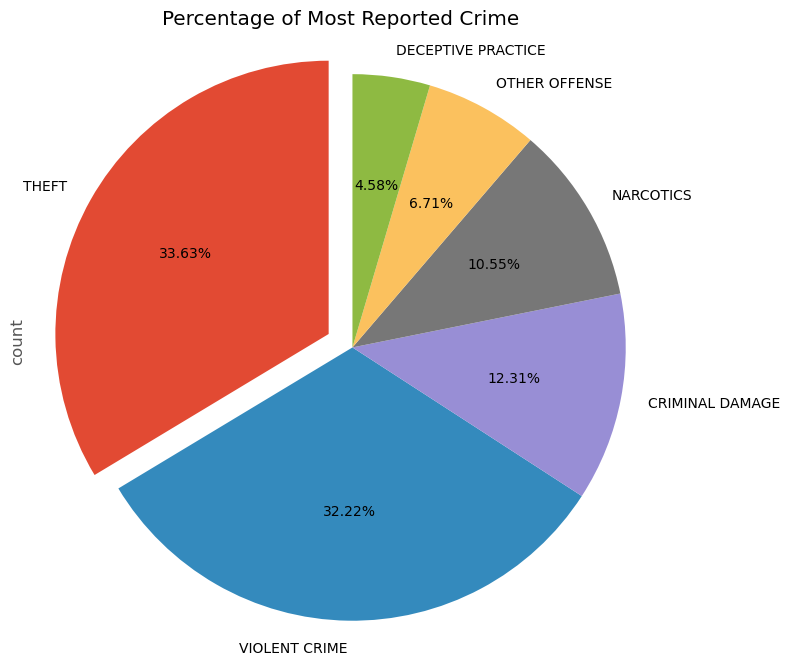

In [75]:
crime_count = c_crime_df['Crime Type'].value_counts()[:6]
explode = (0.1,0,0,0,0,0)
plt.style.use('ggplot')
plt.title('Percentage of Most Reported Crime')
crime_count.plot.pie(explode = explode, autopct = '%.2f%%', shadow=False, startangle = 90, figsize = (8,8))
plt.axis('equal')


__Observation__
1. 33.63% of the overall crime in chicago is attributed to theft
2. This figure is strongly followed by Violent crimes at 32.22%
3. Violent crime here is inclusive of Homicide, sexual violence, Battery, Assault, Robbery and Kidnapping
4. Theft here is inclusive of both property theft such as vehicle theft and petty theft.

#### Top 6 Arrest per Crime Type</br>

(-1.2019553794941775,
 1.1048549920683892,
 -1.1011935131129749,
 1.1250658327623646)

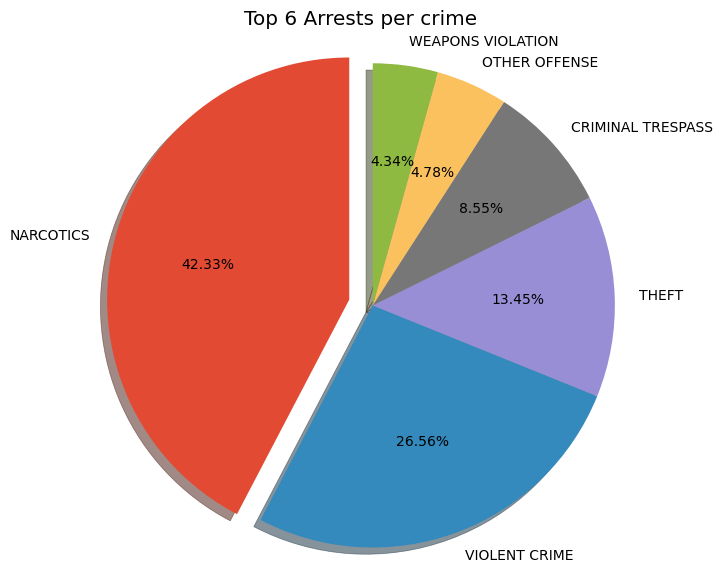

In [76]:
#Top 6 Arrest per crime type

arrest_count = c_crime_df[c_crime_df['Arrest'] == True].groupby('Crime Type').size().sort_values(ascending = False)[:6]
explode = (0.1,0,0,0,0,0)
plt.style.use('ggplot')
plt.title('Top 6 Arrests per crime')
arrest_count.plot.pie(explode = explode, autopct = '%.2f%%', shadow=True, startangle = 90, figsize = (7,7))
plt.axis('equal')

__Observation__
1. Narcotics crime has the highest percentage of arrests at 42.33% compared to theft and violent crimes
2. This is followed by violent crime and theft at 26.56% and 13.45% respectively
3. This shows that there might be many unsolved violent crime and theft cases in Chicago

## __Top 10 common crime by type__</br>

In [77]:
# We try to indentify the trend and highpoints or lowpoints.
# Function to plot the serie value_counts
def plot_counts2(serie, title):
    df = pd.DataFrame(serie.value_counts()[:10])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.pie(df, values='Freq', names='Type', title=title)
    fig.show()


plot_counts2(c_crime_df["Crime Type"], "Top 10 common crime by type")

**Observation:**

THEFT, Violent and CRIMINAL DAMAGE represents more the 62% of the crimes.

## __Top 10 Common location for crimes__

In [78]:
def plot_counts3(serie, title):
    # Create a DataFrame with the top 10 values
    df = pd.DataFrame(serie.value_counts()[:10])
    df.columns = ["Freq"]
    df["Type"] = df.index
    
    # Plot the bar chart
    fig = px.bar(df, x='Type', y='Freq', title=title)
    fig.show()

In [79]:
# Where does crimes happens the most?
plot_counts3(c_crime_df["Location Description"], "Top 10 Location of Crimes")

In [80]:
# Top 10 ward with the most crime in chicago
plot_counts3(c_crime_df["Community Area"], "Top 10 community with Most Crime in Chicago")

In [81]:
# Top 10 ward with the most crime in chicago
plot_counts3(c_crime_df["Ward"], "Top 10 Ward with Most Crime in Chicago")

In [82]:
# Top 10 ward with the most crime in chicago
plot_counts3(c_crime_df["Block"], "Top 10 Block with Most Crime in Chicago")

**Observation**: 

After analyzing the location descriptions, it was found that **STREETS** are one of the most common locations where crimes occur in the dataset. Further analysis revealed that **"100XX IN OHARE Street"** had the highest peak of crime incidents, indicating that it is a hotspot for criminal activity. This observation suggests that targeted interventions and enhanced policing efforts may be needed to address crime issues in that area.

## Top - 10 communities with the most crime in 2021

In [83]:
#  Filter the dataset for the year 2021
chicago_crime_2021 = c_crime_df[c_crime_df['Year'] == 2021]

# Group by community and count the number of crimes
crime_by_community = chicago_crime_2021['Community Area'].value_counts().sort_values(ascending=False)

# Select the top 10 communities with the most crime
top_10_communities = crime_by_community.head(10)

# Create a DataFrame from top 10 communities data
top_10_df = pd.DataFrame({'Community': top_10_communities.index, 'Number of Crimes': top_10_communities.values})

# Plot the top 10 communities with the most crime using a bar plot
fig = px.bar(top_10_df, x='Number of Crimes', y='Community', orientation='h', text='Number of Crimes')
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title='Top 10 Communities with the Most Crime in 2021', xaxis_title='Number of Crimes', yaxis_title='Community')
fig.show()

## Top 5 Primary Crime Types and Their Locations in Chicago (2021)

In [84]:
# Filter the dataset to include only incidents that occurred in 2021
crime_2021 = c_crime_df[c_crime_df['Year'] == 2021]

# Get the top 10 crime types in 2021
top_crime_types_2021 = crime_2021['Primary Type'].value_counts().head().index

# Initialize subplots with multiple rows and columns
fig = make_subplots(rows=len(top_crime_types_2021), cols=1, subplot_titles=top_crime_types_2021)

# Iterate over each top crime type
for i, crime_type in enumerate(top_crime_types_2021, start=1):
    # Filter the dataset for the current crime type
    crime_type_df = crime_2021[crime_2021['Primary Type'] == crime_type]
    
    # Count the occurrences of each location for the current crime type
    location_counts = crime_type_df['Location Description'].value_counts().head()
    
    # Create a bar plot for the current crime type and its top 10 locations
    fig.add_trace(go.Bar(x=location_counts.values, y=location_counts.index, orientation='h',
                         name=crime_type), row=i, col=1)

# Update layout
fig.update_layout(height=1000, title="Top Crime Types and Their Locations in Chicago (2021)",
                  xaxis=dict(title="Number of Incidents"), yaxis=dict(title="Location Description"))

# Show plot
fig.show()


## Top - 10 Location  where theft normally occurs

In [85]:
# Filter the dataset to include only theft-related incidents
theft_df = c_crime_df[c_crime_df['Primary Type'] == 'THEFT']

# Count the occurrences of theft incidents at each location
theft_locations_count = theft_df['Location Description'].value_counts()

# Get the top 10 locations
top_10_theft_locations = theft_locations_count.head(10)

# Create a DataFrame for plotting
df = pd.DataFrame({'Location Description': top_10_theft_locations.index, 'Number of Thefts': top_10_theft_locations.values})

# Plot the top 10 theft locations using a bar plot
fig = px.bar(df, x='Number of Thefts', y='Location Description', orientation='h', text='Number of Thefts')
fig.update_traces(textposition='outside')
fig.update_layout(title='Top 10 Locations for Theft in Chicago', xaxis_title='Number of Thefts', yaxis_title='Location Description')
fig.show()


## Top - 10 Location  for theft in Chicago in 2021

In [86]:
c_crime_df.columns

Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Year', 'Latitude', 'Longitude', 'Month', 'Day', 'Season', 'Hour',
       'Crime Type'],
      dtype='object')

In [87]:
# Filter the dataset to include only theft-related incidents in 2021
theft_2021_df = c_crime_df[(c_crime_df['Primary Type'] == 'THEFT') & (c_crime_df.Year == 2021)]

# Count the occurrences of theft incidents at each location
theft_locations_count = theft_2021_df['Location Description'].value_counts()

# Get the top 10 locations
top_10_theft_locations = theft_locations_count.head(10)

# Create a DataFrame for plotting
df = pd.DataFrame({'Location Description': top_10_theft_locations.index, 'Number of Thefts': top_10_theft_locations.values})

# Plot the top 10 theft locations using a bar plot
fig = px.bar(df, x='Number of Thefts', y='Location Description', orientation='h', text='Number of Thefts')
fig.update_traces(textposition='outside')
fig.update_layout(title='Top 10 Locations for Theft in Chicago in 2021', xaxis_title='Number of Thefts', yaxis_title='Location Description')
fig.show()

## __Number of crimes per Year x Months__ </br>
Let's see the number of crimes per Year and Months...

In [88]:
# first we convert the date column to datetime data type.

c_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")
c_crime_df.set_index("Date", inplace=True)

In [89]:
cases = pd.DataFrame(c_crime_df.resample("M").size(), columns=["Number of cases"])
cases["Month"] = cases.index.month.astype(str)
cases["Year"] = cases.index.year.astype(str)
cases["Year-Month"] = cases["Year"].str.cat(cases["Month"].str.zfill(2), sep="-")
cases.head()

Number of cases Month  Year Year-Month
Date                                              
2001-01-31            11479     1  2001    2001-01
2001-02-28            10134     2  2001    2001-02
2001-03-31            12129     3  2001    2001-03
2001-04-30            11965     4  2001    2001-04
2001-05-31            12566     5  2001    2001-05

BY HEATMAP

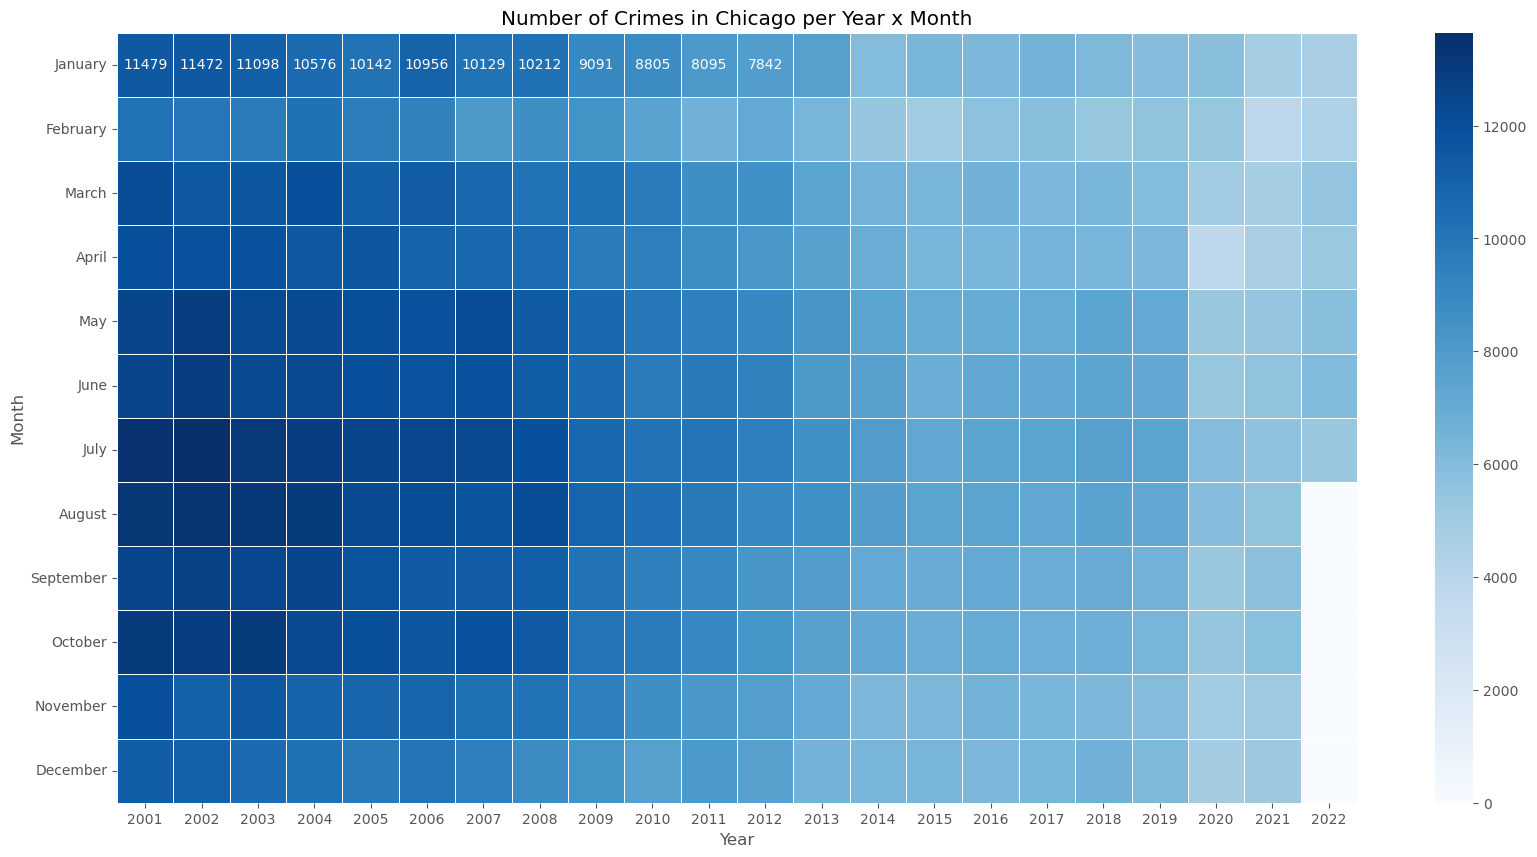

In [90]:
# Pivot the DataFrame to get crime counts for each month and year
crime_table = c_crime_df.pivot_table(index=c_crime_df.index.month_name(), columns=c_crime_df.index.year, aggfunc='size', fill_value=0)

# Reorder the index to match month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crime_table = crime_table.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(crime_table, annot=True, fmt="d", linewidths=0.5, cmap="Blues")
plt.title('Number of Crimes in Chicago per Year x Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


The years between 2001 and 2012 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

BY BAR

In [91]:
fig = px.bar(
    cases,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

*Similar graph but using bars to visualize though noisy but can be used. Again the 'tough time' during 2001 until 2012.*

## Are there specific location that crimes used to happen?

Using Map plot

In [92]:
map_marks = chicago_crime_df[['Latitude', 'Longitude']].copy()
map_marks['Year'] =  pd.to_datetime(chicago_crime_df.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks.head()

Latitude  Longitude  Year
0  41.739980 -87.555120  2008
1  41.726922 -87.599747  2018
2  41.994138 -87.734959  2007
3  41.881217 -87.730590  2018
4  41.874174 -87.668082  2021

In [93]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Observation**::

It Looks like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.
The map of Chicago indicates that crimes are distributed evenly throughout the city, with no discernible clustering or concentration in specific locations. This suggests that criminal activity is prevalent across various neighborhoods and districts in Chicago, rather than being confined to particular areas. Such widespread distribution of crime may indicate systemic issues related to crime prevention, law enforcement, socio-economic factors, or community dynamics that affect the entire city. Addressing these underlying factors requires comprehensive strategies that focus on enhancing community safety, improving law enforcement efforts, addressing socio-economic disparities, and promoting community engagement and collaboration. Additionally, it underscores the importance of data-driven approaches to identify high-risk areas and allocate resources effectively to combat crime across the city.

## Count of Arrest and Non-Arrest for Each Crime Type

In [94]:
# Group by 'Crime Type' and 'Arrest' and count occurrences
crime_arrest_counts = c_crime_df.groupby(['Crime Type', 'Arrest']).size().unstack(fill_value=0)

# Plot horizontally stacked bar plot
fig = px.bar(crime_arrest_counts, orientation='h', barmode='stack')
fig.update_layout(title='Count of Arrest and Non-Arrest for Each Crime Type', xaxis_title='Count', yaxis_title='Crime Type')
fig.show()

In [95]:
# Combine the percentages into a DataFrame
percentage_df = pd.DataFrame({'Crime Type': arrest_percentage.index, 'Arrest Percentage': arrest_percentage.values, 'Non-Arrest Percentage': non_arrest_percentage.values})

# Plot the horizontal bar chart using Plotly
fig = px.bar(percentage_df, x=['Arrest Percentage', 'Non-Arrest Percentage'], y='Crime Type', barmode='group')
fig.update_layout(title="Percentage of Arrest and Non-Arrest for Each Crime Type", xaxis_title="Percentage", yaxis_title="Crime Type", legend_title="Type")
fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation.

6. Summarize Insights: Summarize the key insights and findings from the analysis.
    - How has crime in Chicago changed across years? Was 2021 really the bloodiest year in two decades?
    - Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week, or specific month of the year than other types of crimes?

1. **[Q]** How has crime in Chicago changed across years? Was 2021 really the bloodiest year in two decades?

- **[A]** Crime rates in chicago has taken a downwards trend from 2001 till 2021. A downward trend in crime rates is generally considered a positive sign for a community or city. It indicate that various factors such as improved law enforcement strategies, community policing initiatives, economic development, social programs, and advancements in technology have been effective in reducing crime. The year 2021 is not the bloodiest year from our observation and also because the crime rate has taken a downward trend since 2001. The downward trend in crime rates from 2001 to 2022 is a promising observation that reflects potential successes in crime prevention efforts, community engagement, and policy interventions. However, ongoing monitoring, evaluation, and collaboration among stakeholders are crucial to sustain and further build upon these achievements in ensuring community safety and well-being.

2. **[Q]** Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week, or specific month of the year than other types of crimes?

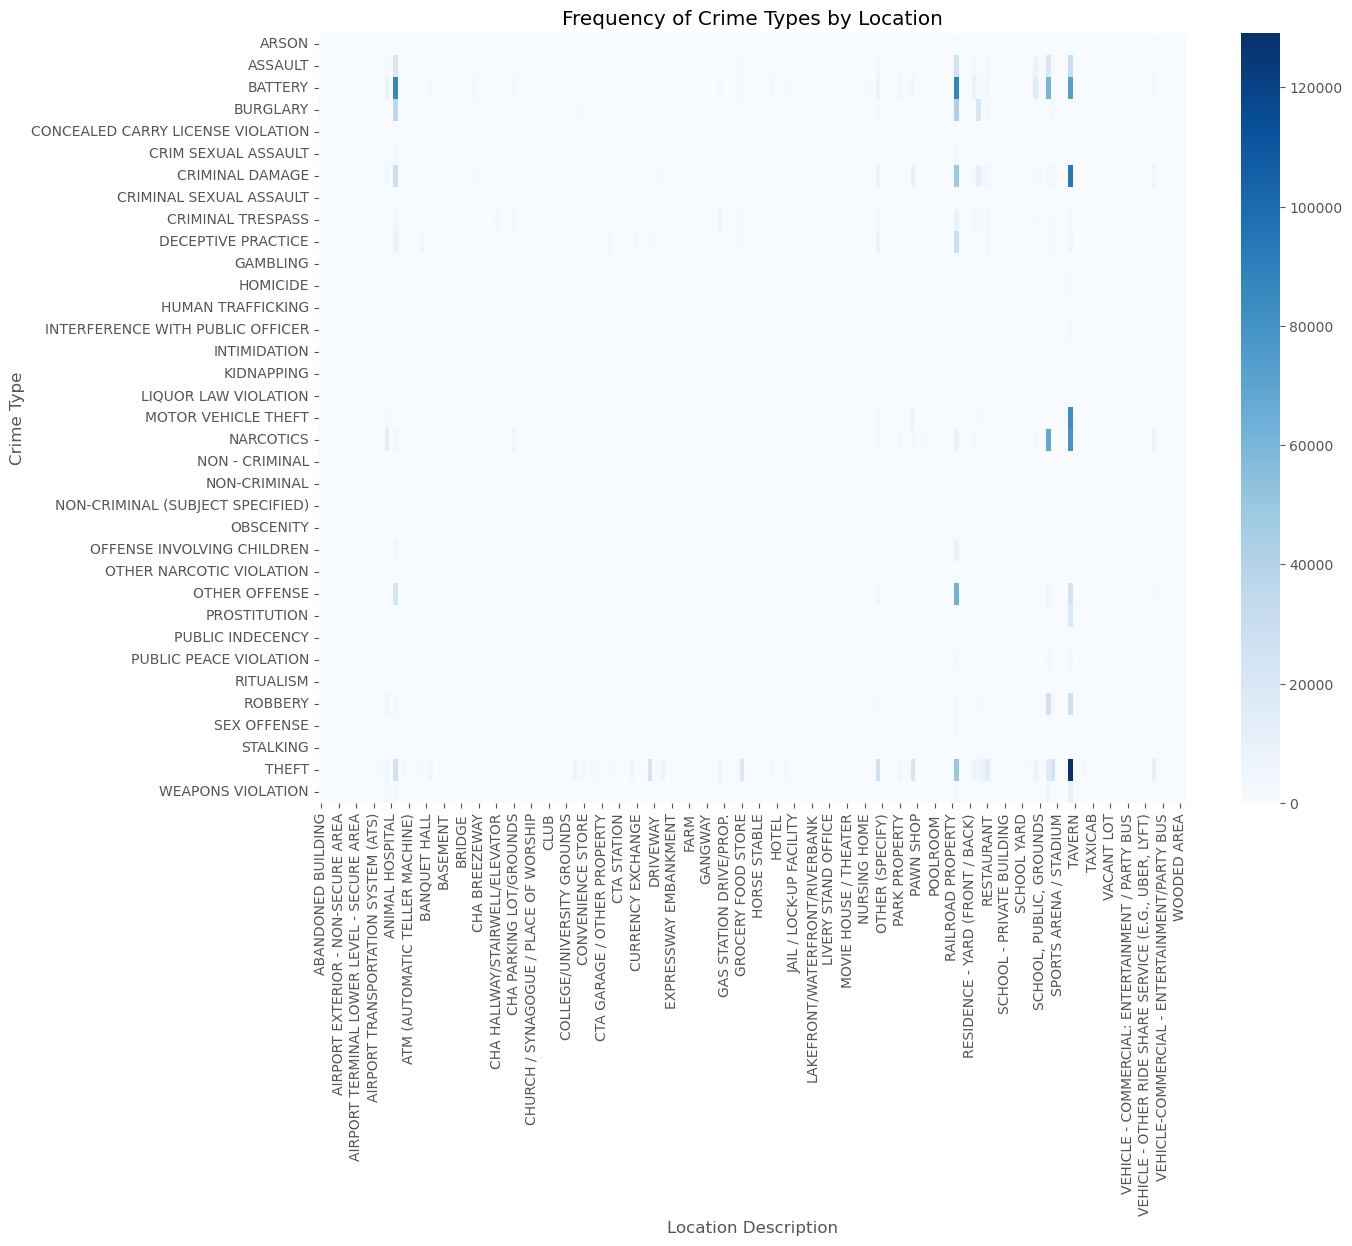

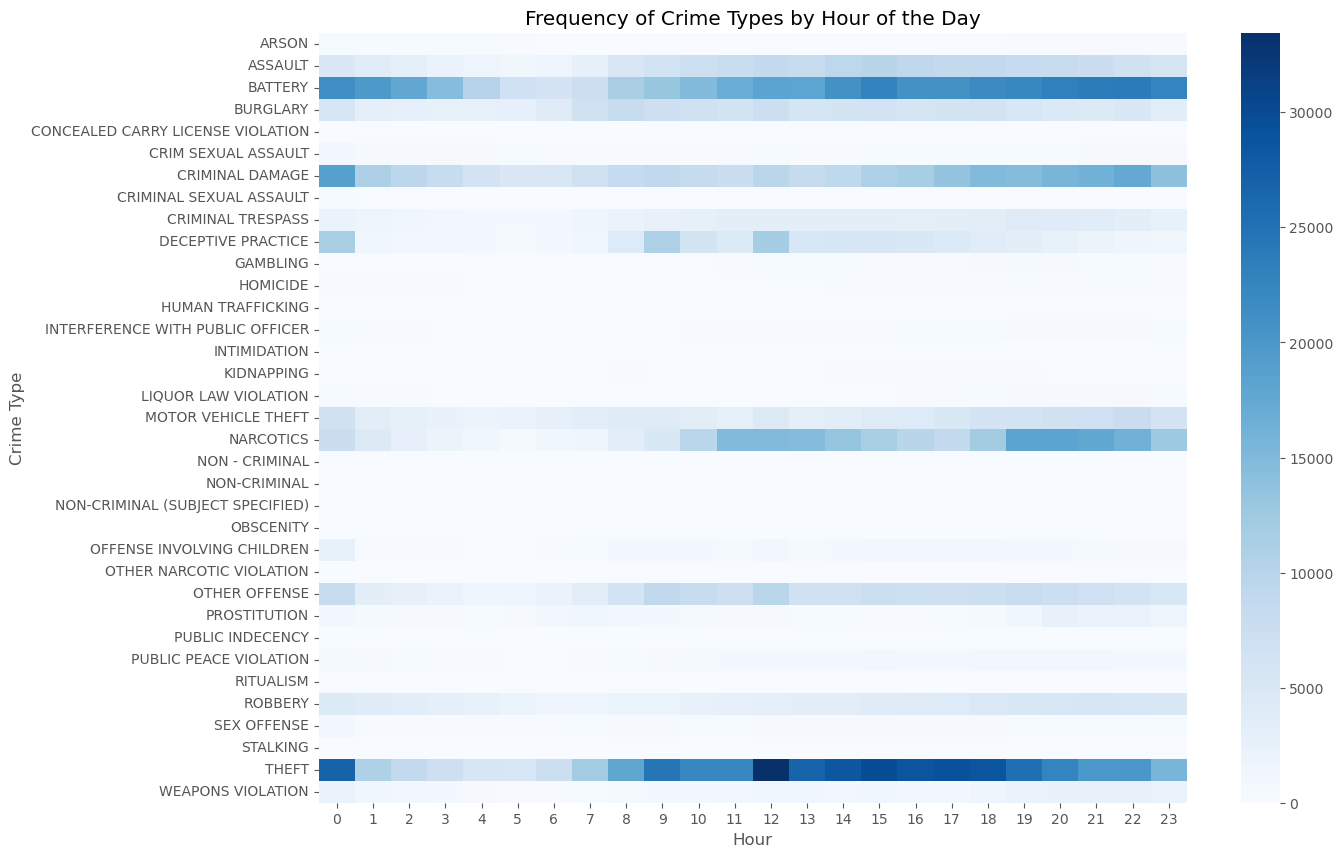

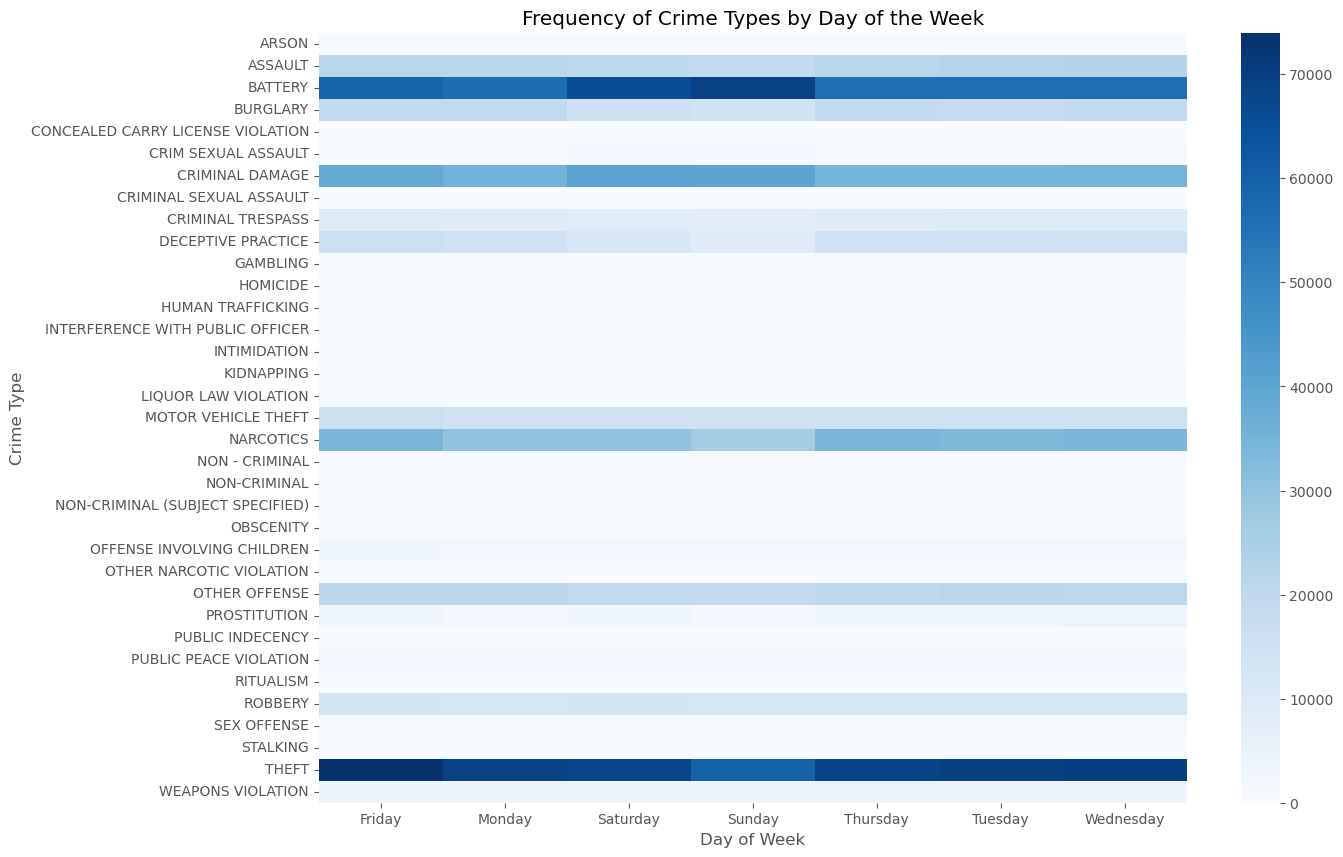

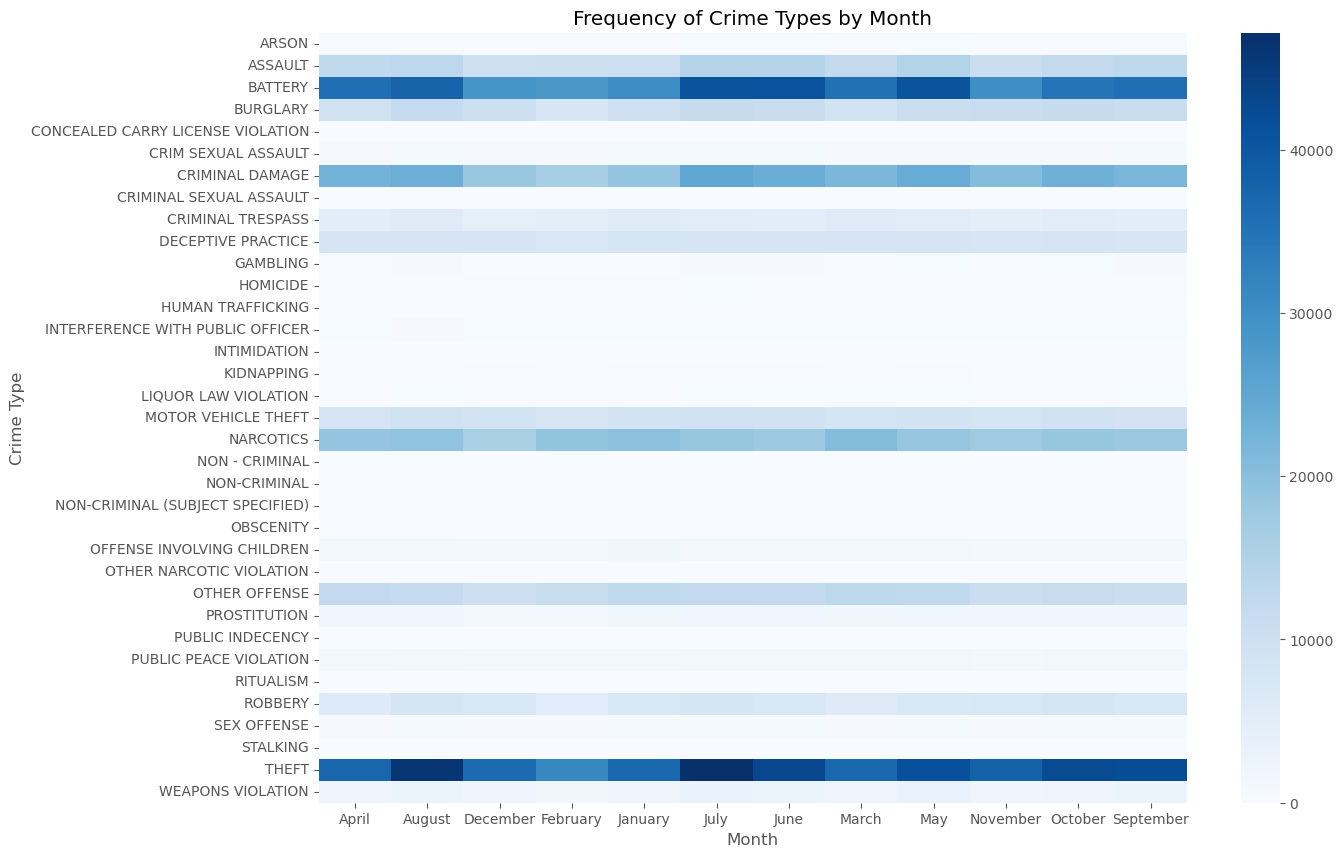

In [96]:
# Specific Locations
plt.figure(figsize=(14, 10))
sns.heatmap(c_crime_df.pivot_table(index='Primary Type', columns='Location Description', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Frequency of Crime Types by Location')
plt.xlabel('Location Description')
plt.ylabel('Crime Type')
plt.xticks(rotation=90)
plt.show()

# Specific Times of the Day
plt.figure(figsize=(14, 10))
sns.heatmap(c_crime_df.pivot_table(index='Primary Type', columns='Hour', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Frequency of Crime Types by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Crime Type')
plt.show()

# Specific Days of the Week
plt.figure(figsize=(14, 10))
sns.heatmap(c_crime_df.pivot_table(index='Primary Type', columns='Day', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Frequency of Crime Types by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Crime Type')
plt.show()

# Specific Month of the year
plt.figure(figsize=(14, 10))
sns.heatmap(c_crime_df.pivot_table(index='Primary Type', columns='Month', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Frequency of Crime Types by Month')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.show()


**Observation:** 

The analysis revealed distinct patterns in the occurrence of different types of crimes across various dimensions such as location, time of the day, day of the week, and month of the year.

1. Specific Locations: Certain types of crimes showed a propensity to occur more frequently in particular locations. For example, theft-related crimes are more prevalent in crowded areas such as commercial districts in our case,**TAVERN** while violent crimes like assaults occur more frequently in residential neighborhoods or areas with high foot traffic.

2. Time of the Day: The analysis indicated variations in crime rates depending on the time of the day. Some types of crimes exhibited diurnal patterns, with peaks during certain hours. For instance, burglaries are more common during daytime hours when residences are more likely to be unoccupied, while robberies may occur more frequently during evening hours.

3. Day of the Week: Certain types of crimes displayed fluctuations in occurrence based on the day of the week. For example, alcohol-related offenses or disturbances might increase on weekends when social activities are more prevalent, while property crimes like theft and burglaries might occur more frequently on weekdays when residential areas are less populated due to work.

4. Month of the Year: The analysis also revealed seasonal variations in crime rates. Certain types of crimes may exhibit increased activity during specific months due to factors such as weather conditions, holidays, or cultural events. For instance, thefts might rise during holiday shopping seasons, while vandalism or disorderly conduct might increase during summer months when outdoor activities are more common.

Overall, the observation highlights the complex interplay of various factors influencing crime patterns, including environmental, social, and temporal factors. Understanding these patterns is crucial for law enforcement agencies, policymakers, and community stakeholders to develop targeted interventions and strategies aimed at preventing and reducing crime in specific locations and times. Additionally, it underscores the importance of data-driven approaches in identifying high-risk areas and implementing effective crime prevention measures.